# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

## Data Import and first Inspection

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [9]:
df = pd.read_csv("movies_complete.csv", parse_dates= ["release_date"])

In [10]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.00,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.00,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.00,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.00,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

__Features__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [ ]:
df.genres[1]

In [ ]:
df.cast[1]

In [ ]:
df.describe()

In [ ]:
df.hist(figsize = (20, 12), bins = 100)
plt.show()

In [ ]:
df.budget_musd.value_counts(dropna = False).head(20)

In [ ]:
df.revenue_musd.value_counts(dropna = False).head(20)

In [ ]:
df.vote_average.value_counts(dropna = False)

In [ ]:
df.vote_count.value_counts()

In [ ]:
df.describe(include = "object")

In [ ]:
df[df.title == "Cinderella"]

## The best and the worst movies... (Part 1)

In [ ]:
from IPython.display import HTML
pd.options.display.max_colwidth = 200

In [ ]:
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity"]].copy()
df_best

In [ ]:
df_best["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
df_best["return"] = df.revenue_musd.div(df.budget_musd)

In [ ]:
df_best

In [ ]:
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes", 
                   "Average Rating", "Popularity", "Profit", "ROI"]

In [ ]:
df_best.set_index("Title", inplace = True)

In [ ]:
df_best

In [ ]:
df_best.iloc[0,0]

In [ ]:
subset = df_best.iloc[:5, :2]
subset

In [ ]:
HTML(subset.to_html(escape=False))

In [ ]:
df_best.sort_values(by = "Average Rating", ascending = False)

In [ ]:
df_best.sort_values(by = "ROI", ascending = False)

In [ ]:
df_best.loc[df_best.Budget >= 5].sort_values(by = "ROI", ascending = False)

In [ ]:
df_best.Budget.fillna(0, inplace = True)
df_best.Votes.fillna(0, inplace = True)

In [ ]:
df_best.info()

In [ ]:
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):
    
    
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes), 
                      ["", by]].sort_values(by = by, ascending = ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

## The best and the worst movies... (Part 2)

__Movies Top 5 - Highest Revenue__

In [ ]:
best_worst(n = 5, by = "Revenue")

__Movies Top 5 - Highest Budget__

In [ ]:
best_worst(5, "Budget")

__Movies Top 5 - Highest Profit__

In [ ]:
best_worst(5, "Profit")

__Movies Top 5 - Lowest Profit__

In [ ]:
best_worst(5, "Profit", ascending = True)

__Movies Top 5 - Highest ROI__

In [ ]:
best_worst(5, "ROI", min_bud = 50)

__Movies Top 5 - Lowest ROI__

In [ ]:
best_worst(5, "ROI", ascending = True, min_bud = 100)

__Movies Top 5 - Most Votes__

In [ ]:
best_worst(5, "Votes")

__Movies Top 5 - Highest Rating__

In [ ]:
best_worst(5, "Average Rating", min_votes = 50)

__Movies Top 5 - Lowest Rating__

In [ ]:
best_worst(5, "Average Rating", ascending = True, min_votes = 100)

In [ ]:
best_worst(5, "Average Rating", ascending = True, min_votes = 20, min_bud = 20)

__Movies Top 5 - Most Popular__

In [ ]:
best_worst(5, "Popularity")

## Find your next Movie

__Search 1: Science Fiction Action Movie with Bruce Willis (high Rating)__

In [ ]:
df.genres[0]

In [ ]:
mask_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
mask_genres

In [ ]:
df.cast[0]

In [ ]:
mask_actor = df.cast.str.contains("Bruce Willis")
mask_actor

In [ ]:
df.loc[mask_actor & mask_genres, ["title", "vote_average"]].sort_values(by = "vote_average", 
                                                                        ascending = False)

In [ ]:
bruce = df.loc[mask_actor & mask_genres, ["title", "poster_path", "vote_average"]].sort_values(by = "vote_average", ascending = False).set_index("title")

In [ ]:
HTML(bruce.to_html(escape=False))

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (low runtime)__

In [ ]:
df.director

In [ ]:
mask_director = df.director == "Quentin Tarantino"

In [ ]:
mask_actor = df.cast.str.contains("Uma Thurman")

In [ ]:
quentin = df.loc[mask_director & mask_actor, 
               ["title", "poster_path", "runtime"]].sort_values(by = "runtime").set_index("title")

In [ ]:
HTML(quentin.to_html(escape=False))

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (high Revenue)__

In [ ]:
df.production_companies[1]

In [ ]:
mask_studio = df.production_companies.str.contains("Pixar").fillna(False)

In [ ]:
df.release_date

In [ ]:
mask_time = df.release_date.between("2010-01-01", "2015-12-31")

In [ ]:
pixar = df.loc[mask_studio & mask_time, 
               ["title", "poster_path", "revenue_musd", "release_date"]].sort_values(by = "revenue_musd", ascending = False).set_index("title")

In [ ]:
HTML(pixar.to_html(escape=False))

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent)__

In [ ]:
mask_genre = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")

In [ ]:
mask_lan = df.original_language == "en"

In [ ]:
mask_vote_av = df.vote_average >= 7.5 

In [ ]:
mask_vote_co = df.vote_count >= 10

In [ ]:
next_mov = df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co, 
               ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by = "release_date", ascending = False).set_index("title").head(20)

In [ ]:
HTML(next_mov.to_html(escape=False))

## What are the most common Words in Movie Titles and Taglines?

In [22]:
from wordcloud import WordCloud

In [23]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,Franchise,ROI
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,True,12.45
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,False,4.04
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,True,NaN
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,False,5.09
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.00,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah,False,NaN
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.00,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz,False,NaN
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.00,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester,False,NaN
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.00,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov,False,NaN


In [ ]:
df.tagline[1]

In [ ]:
df.overview[1]

In [26]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [27]:
title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [ ]:
' '.join(title)

In [ ]:
title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

In [ ]:
tagline_corpus

In [29]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(title_corpus)
title_wordcloud

NameError: name 'title_corpus' is not defined

In [28]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

NameError: name 'title_wordcloud' is not defined

<Figure size 1152x576 with 0 Axes>

In [ ]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

## Are Franchises more successful?

In [12]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [13]:
df["Franchise"] = df.belongs_to_collection.notna()

In [ ]:
df.Franchise

In [ ]:
df.Franchise.value_counts()

__Franchise vs. Stand-alone: Average Revenue__

In [ ]:
df.groupby("Franchise").revenue_musd.mean()

__Franchise vs. Stand-alone: Return on Investment / Profitability__

In [15]:
df["ROI"] = df.revenue_musd.div(df.budget_musd)

In [16]:
df.groupby("Franchise").ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [ ]:
df.groupby("Franchise").budget_musd.mean()

__Franchise vs. Stand-alone: Average Popularity__

In [ ]:
df.groupby("Franchise").popularity.mean()

__Franchise vs. Stand-alone: Average Rating__

In [ ]:
df.groupby("Franchise").vote_average.mean()

In [17]:
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.05,44.74,6.01,2.59,1.62,78.29
True,38.32,165.71,5.96,6.25,3.71,412.39


## Most Successful Franchises

In [ ]:
df.belongs_to_collection

In [ ]:
df.belongs_to_collection.value_counts()

In [30]:
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median", 
                                                      "vote_count":"mean"})

In [31]:
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2      130.00 65.00       366.78   
00 Schneider Filmreihe                   1        0.00   NaN         0.00   
08/15 Collection                         1        0.00   NaN         0.00   
100 Girls Collection                     2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection     2        4.00  4.00       215.88   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1        0.00   NaN         0.00   
Чебурашка и крокодил Гена                1        0.00   NaN         0.00   
Что Творят мужчины! (Коллекция)          2        2.00  2.00         0.00   
男はつらいよ シリーズ                              3        0.00   NaN         0.00   
식객 시리즈                                   2        0.00   NaN         0.00   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
... Has Fallen Collection            183.39         6.00      13.01   2.86   
00 Schneider Filmreihe                  NaN         6.50       1.93    NaN   
08/15 Collection                        NaN         5.90       0.63    NaN   
100 Girls Collection                    NaN         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection 215.88         6.25      13.06  53.97   
...                                     ...          ...        ...    ...   
Сказки Чуковского                       NaN         3.00       0.73    NaN   
Чебурашка и крокодил Гена               NaN         6.70       0.88    NaN   
Что Творят мужчины! (Коллекция)         NaN         3.15       1.30    NaN   
男はつらいよ シリーズ                             NaN         7.00       0.04    NaN   
식객 시리즈                                  NaN         4.95       0.16    NaN   

                                     vote_count  
                                           mean  
belongs_to_collection                            
... Has Fallen Collection               2333.00  
00 Schneider Filmreihe                    16.00  
08/15 Collection                           4.00  
100 Girls Collection                      64.00  
101 Dalmatians (Animated) Collection     937.00  
...                                         ...  
Сказки Чуковского                          3.00  
Чебурашка и крокодил Гена                  7.00  
Что Творят мужчины! (Коллекция)            5.50  
男はつらいよ シリーズ                                0.67  
식객 시리즈                                     3.50  

[1691 rows x 9 columns]

In [20]:
franchises.nlargest(20, ("title", "count"))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   NaN         0.00   
Totò Collection                           27        0.00   NaN         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   NaN         0.00   
The Carry On Collection                   25        0.00   NaN         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   NaN         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   NaN         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   
Uuno Turhapuro                            15        0.00   NaN         0.00   
Monster High Collection                   14        0.50  0.50         0.00   
The Land Before Time Collection           14       12.30 12.30        84.46   
George Carlin Comedy Collection           13        0.00   NaN         0.00   
Sharpe Collection                         13        0.00   NaN         0.00   
Friday the 13th Collection                12       84.40  7.03       464.90   
Johan Falk GSI Collection                 12        0.00   NaN         0.00   
Sherlock Holmes (1939 series)             12        0.00   NaN         0.00   
The Amityville Horror Collection          12       21.02  5.25       213.35   
An American Girl Collection               10        6.80  6.80         0.00   

                                              vote_average popularity    ROI  \
                                         mean         mean       mean median   
belongs_to_collection                                                          
The Bowery Boys                           NaN         6.67       0.20    NaN   
Totò Collection                           NaN         6.84       1.05    NaN   
James Bond Collection                  273.35         6.34      13.45   6.13   
Zatôichi: The Blind Swordsman             NaN         6.40       1.10    NaN   
The Carry On Collection                   NaN         6.17       3.22    NaN   
Charlie Chan (Sidney Toler) Collection    NaN         6.61       0.63    NaN   
Pokémon Collection                      66.87         6.05       4.37   4.46   
Godzilla (Showa) Collection               NaN         5.97       3.42    NaN   
Charlie Chan (Warner Oland) Collection    NaN         6.66       0.66    NaN   
Dragon Ball Z (Movie) Collection        56.06         6.61       6.18  12.35   
Uuno Turhapuro                            NaN         5.53       0.17    NaN   
Monster High Collection                   NaN         6.49       3.59    NaN   
The Land Before Time Collection         84.46         6.16       4.91   6.87   
George Carlin Comedy Collection           NaN         7.47       1.30    NaN   
Sharpe Collection                         NaN         6.74       1.71    NaN   
Friday the 13th Collection              38.74         5.42       9.76   6.67   
Johan Falk GSI Collection                 NaN         6.50       1.52    NaN   
Sherlock Holmes (1939 series)             NaN         6.92       2.88    NaN   
The Amityville Horror Collection        53.34         4.36       7.18   5.69   
An American Girl Collection               NaN         5.25       1.94    NaN   

                                       vote_count  
                                             mean  
belongs_to_collection                              
The Bowery Boys                              0.72  
Totò Collection                             18.04  
James Bond Collection                     1284.31  
Zatôichi: The Blind Swordsman               11.19  
The Carry On Col

In [ ]:
franchises.nlargest(20, ("revenue_musd", "mean"))

In [ ]:
franchises.nlargest(20, ("budget_musd", "mean"))

In [ ]:
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(20, ("vote_average", "mean"))

## Most Successful Directors

In [ ]:
df.director

In [ ]:
df.director.value_counts().head(20)

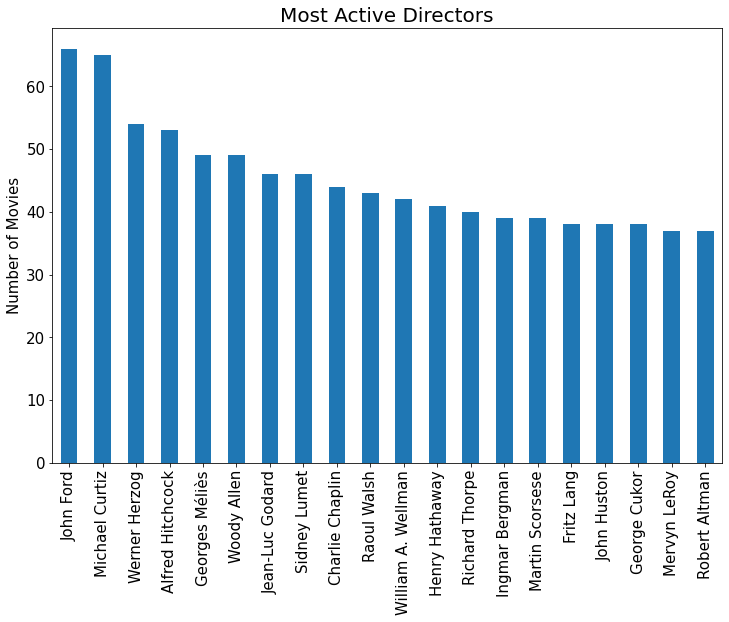

In [32]:
plt.figure(figsize = (12, 8))
df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [33]:
df.groupby("director").revenue_musd.sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

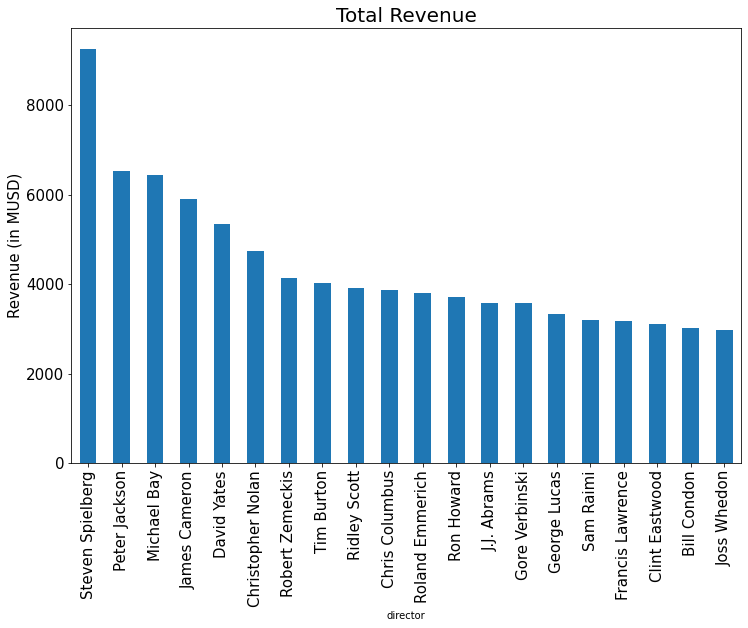

In [34]:
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [ ]:
directors = df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})

In [ ]:
directors

In [ ]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")

In [37]:
df.genres = df.genres.astype(str)

In [39]:
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

## Most Successful Actors (Part 1)

In [ ]:
df.cast

In [ ]:
df

In [ ]:
df.set_index("id", inplace = True)

In [ ]:
df.info()

In [ ]:
df.cast

In [ ]:
df.cast.str.split("|", expand = True)

In [ ]:
act = df.cast.str.split("|", expand = True)
act

In [ ]:
act.stack().reset_index(level=1, drop=True).to_frame()

In [ ]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [ ]:
act

In [ ]:
act.columns = ["Actor"]

In [ ]:
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how = "left", left_index = True, right_index = True)

In [ ]:
act

## Most Successful Actors (Part 2)

In [ ]:
act

In [ ]:
act.Actor.nunique()

In [ ]:
act.Actor.unique()

In [ ]:
act.Actor.value_counts().head(20)

In [ ]:
plt.figure(figsize = (12, 8))
act.Actor.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Actors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [ ]:
agg = act.groupby("Actor").agg(Total_Revenue = ("revenue_musd", "sum"), 
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"), 
                               Mean_Pop = ("popularity", "mean"), 
                               Total_Movies = ("Actor", "count"))

In [ ]:
agg.nlargest(10, "Total_Movies")

In [ ]:
agg.nlargest(10, "Total_Revenue")

In [ ]:
plt.figure(figsize = (12, 8))
agg.Total_Revenue.nlargest(10).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [ ]:
agg.Mean_Revenue.nlargest(10)

In [ ]:
act[act.Actor == "Ashley Jeffery"]

In [ ]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Revenue")

In [ ]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Rating")

In [ ]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Pop")